#**CSIE5732 Computer Vision, NTU, TPE**
[Homework4](http://cv2.csie.ntu.edu.tw/CV/hw2019/hw4.html)


>Deadline : 2022-10-18

> Hello TA, the colab file can be found in the [URL](https://colab.research.google.com/drive/11jpfYYmxwIFqlyEQ24YUj2sQblGNpE2O?usp=sharing)





##Description:
###Write programs which do binary morphology on a binary image:
**primary morphological (形態学的) operations**
*   (a) Dilation (膨張)
*   (b) Erosion (浸食)

**composed from dilation, erosion; related to shape representation, decomposition, primitive extraction**
*   (c) Opening
*   (d) Closing
*   (e) Hit-and-miss transform

###Announcement
*   Binarize Lena with the threshold 128 (0-127,128-255).
*   Please use the octogonal 3-5-5-5-3 kernel.
*   Please use the "L" shaped kernel (same as the text book) to detect the upper-right corner for hit-and-miss transform.
*   Please process the white pixels (operating on white pixels).
*   5 images should be included in your report: Dilation, Erosion, Opening, Closing, and Hit-and-Miss.
*   You can use any programing language to implement homework, however, you'll get zero point if you just call existing library.


###**FAQ**
*   Q1: 有規定報告的頁數嗎?
>沒有，但建議不要超過4頁。報告內容簡短扼要即可。
*   Q2: 請問之前作業實作過的函式，以後作業可以直接 call 現成函式嗎?
>可以哦，如果是之前作業手刻過的函式，之後用到可以任意 call function.
*   Q3: 結果影像和課程網站的範例圖不太一樣?
>邊界部分有稍微不同沒關係。




##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **cv2**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.






In [ ]:
import numpy as np
from past.builtins import xrange
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display
MAX_PIXEL_VALUE = 255

##Step2: define the class for the morphological transformations

In [ ]:
class HW4:
    def __init__(self, dirc, objc):
        self.img    = cv2.imread(dirc+objc,0)
        self.dirc    = dirc
        self.shape  = self.img.shape
        self.nRow  = self.img.shape[0]
        self.nCol   = self.img.shape[1]
    def original(self):
        return self.img
    def positionWithInBoundary(self,x,y):
        return x > -1 and x < self.nRow and y > -1 and y < self.nCol
    def complement(self, image):
        complementImg = np.zeros(self.shape, dtype=np.int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                complementImg[rowIdx][colIdx] = -image[rowIdx][colIdx] + MAX_PIXEL_VALUE
        return complementImg
    def binarize(self, thresh, maxval):
        binarizedImg = np.zeros(self.shape, dtype=np.int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                binarizedImg[rowIdx, colIdx] = maxval if self.img[ rowIdx, colIdx ] > thresh else 0
        return binarizedImg
    def dilation(self, binarizedImg, kernel):
        dilatedImg = np.zeros(self.shape, dtype=np.int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                #Please process the white pixels (operating on white pixels)
                if binarizedImg[rowIdx][colIdx] > 0:
                    for vector in kernel:
                        # translation of binarized image B by the kernel vector k
                        x = rowIdx + vector[0]
                        y = colIdx + vector[1]
                        if self.positionWithInBoundary(x,y):
                            dilatedImg[x][y] = MAX_PIXEL_VALUE
        return dilatedImg
    def erosion(self, binarizedImg, kernel):
        erodedImg = np.zeros(self.shape, dtype=np.int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                #Please process the white pixels (operating on white pixels)
                intersection_boolean_value = True
                # erosion of the image A by the kernel B is the set of all x s.t. { (rowIdx,colIdx) + k belongs to B, for "every" vector k in kernel K }
                for vector in kernel:
                    # translation of binarized image B by the kernel vector k
                    x = rowIdx + vector[0]
                    y = colIdx + vector[1]
                    # (rowIdx,colIdx) + k does not belong to B : binarizedImg[x][y] == 0
                    if not self.positionWithInBoundary(x,y) or binarizedImg[x][y] == 0:
                        intersection_boolean_value = False
                        break
                if intersection_boolean_value == True:
                    erodedImg[rowIdx][colIdx] = MAX_PIXEL_VALUE
        return erodedImg
    def closing(self, binarizedImg,kernel):
        return self.erosion(self.dilation(binarizedImg,kernel),kernel)
    def opening(self, binarizedImg,kernel):
        return self.dilation(self.erosion(binarizedImg,kernel),kernel)
    def intersection(self,image1, image2):
        img_hm_transformed = np.zeros(self.shape, dtype=np.int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                condition1 = image1[rowIdx][colIdx] > 0
                condition2 = image2[rowIdx][colIdx] > 0
                if (condition1 and condition2):
                    img_hm_transformed[rowIdx][colIdx] = MAX_PIXEL_VALUE
        return img_hm_transformed
    def hit_and_miss(self, A, J, K):
        # Ac is the complement of A
        Ac = self.complement( A )
        image1 = self.erosion(A, J)
        image2 = self.erosion(Ac, K)
        return self.intersection( image1, image2 )

##Step3 Initiate an object from the class constructor

In [ ]:
dir_ = '/content/'
img2 = 'lena.bmp'
obj2 = HW4(dir_,img2)

##Step4: Carry out the six transformations

### the orignal image
    

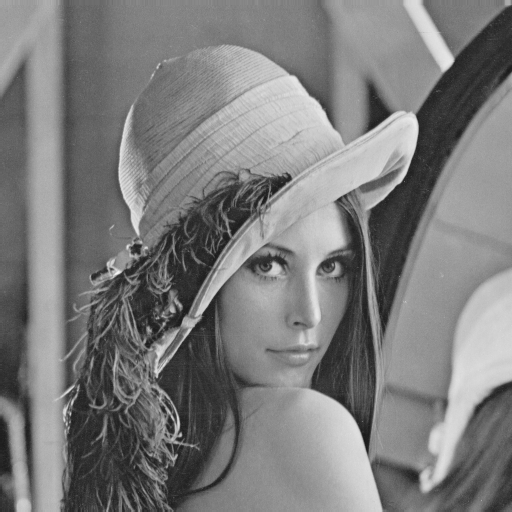

In [ ]:
cv2_imshow(obj2.original())

### the binarized image
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


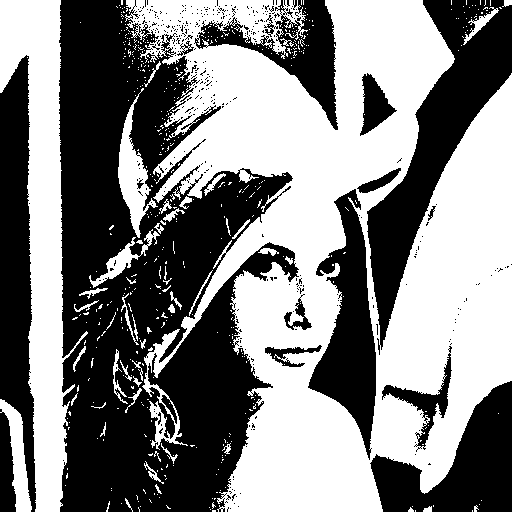

True

In [ ]:
# Binarize Lena with the threshold 128 (0-127,128-255).
thresh = 127
img_binarized = obj2.binarize(thresh, MAX_PIXEL_VALUE)
cv2_imshow( img_binarized )
cv2.imwrite('lena_binarized.bmp', img_binarized)

In [ ]:
# please use the octogonal 3-5-5-5-3 kernel.
kernel = [ [-2, -1], [-2, 0], [-2, 1], [-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2], [0, -2], [0, -1], [0, 0], [0, 1], [0, 2], [1, -2], [1, -1], [1, 0], [1, 1], [1, 2], [2, -1], [2, 0], [2, 1] ]

###(a) [Dilation (膨張)](https://en.wikipedia.org/wiki/Dilation_(morphology))
\begin{align}
\mathbf{B} \oplus \mathbf{K} = \cup_{k\in K}B_{k}
\end{align}

$B_{k}$ is the translation of B by k.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


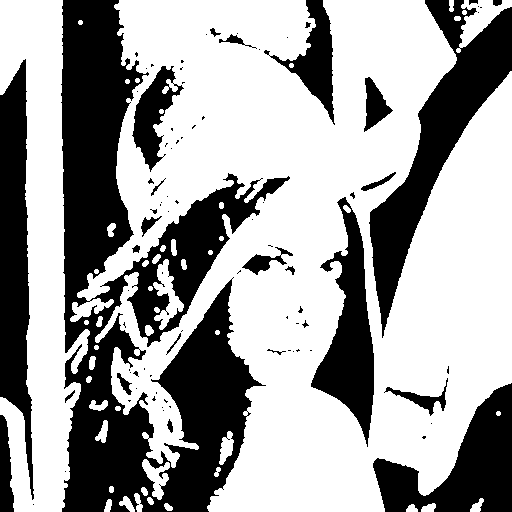

In [ ]:
dilated_image = obj2.dilation(img_binarized,kernel)
cv2.imwrite( 'a_dilated_image.bmp', dilated_image )
cv2_imshow( dilated_image )

###(b) [Erosion (浸食)](https://en.wikipedia.org/wiki/Erosion_(morphology)#:~:text=Erosion%20(usually%20represented%20by%20%E2%8A%96,and%20subsequently%20to%20complete%20lattices.)

\begin{align}
\mathbf{B} \ominus \mathbf{K} = \cap_{k\in K}B_{-k}
\end{align}

$B_{-k}$ is the translation of B by -k.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


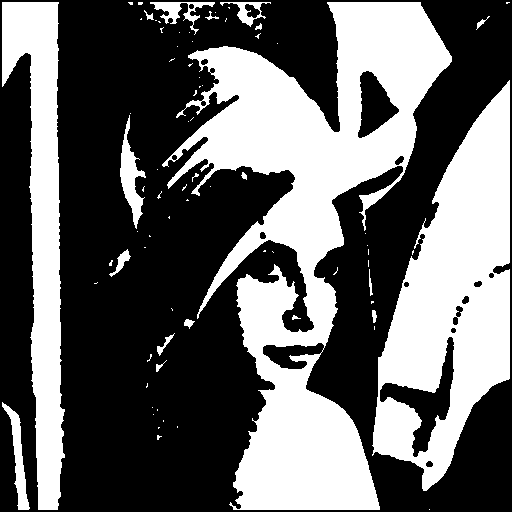

In [ ]:
eroded_image = obj2.erosion(img_binarized,kernel)
cv2.imwrite( 'b_eroded_image.bmp', eroded_image )
cv2_imshow( eroded_image )

###(c) Opening

\begin{align}
\mathbf{B} | \mathbf{K} = (\mathbf{B} \ominus \mathbf{K})\oplus \mathbf{K}
\end{align}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

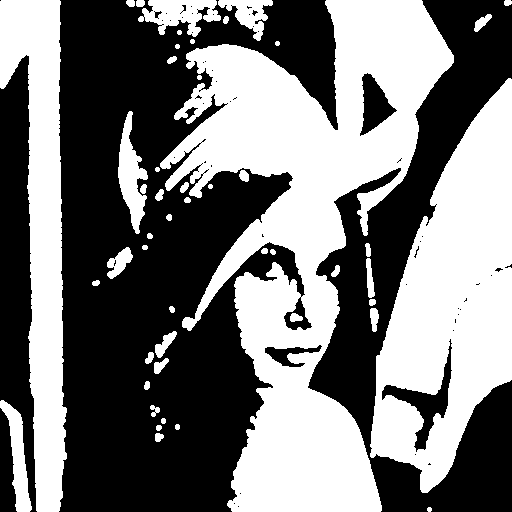

In [ ]:
opening_ = obj2.opening(img_binarized,kernel)
cv2.imwrite( 'c_opening_.bmp', opening_ )
cv2_imshow( opening_ )

###(d) Closing

\begin{align}
\mathbf{B} \cdot \mathbf{K} = (\mathbf{B} \oplus \mathbf{K})\ominus \mathbf{K}
\end{align}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

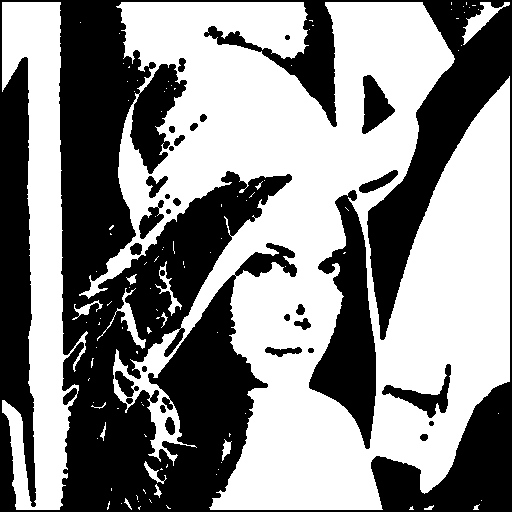

In [ ]:
closing_ = obj2.closing(img_binarized,kernel)
cv2.imwrite( 'd_closing_.bmp', closing_ )
cv2_imshow( closing_ )

### [(e) Hit-or-miss transform](https://en.wikipedia.org/wiki/Hit-or-miss_transform)

\begin{align}
\mathbf{A} \otimes (\mathbf{J}, \mathbf{K}) = (\mathbf{A} \ominus \mathbf{J}) \cap (\mathbf{A^c} \ominus \mathbf{K})
\end{align}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional inf

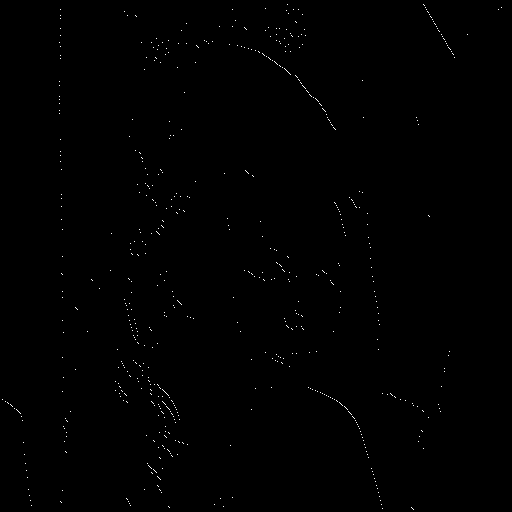

In [ ]:
J = [[1, 0], [1, -1],[0,-1]]
K = [[0, 1], [0, 0], [-1, 0]]

hitandmiss_ = obj2.hit_and_miss(img_binarized,J,K)
cv2.imwrite( 'e_hitandmiss_.bmp', hitandmiss_ )
cv2_imshow( hitandmiss_ )

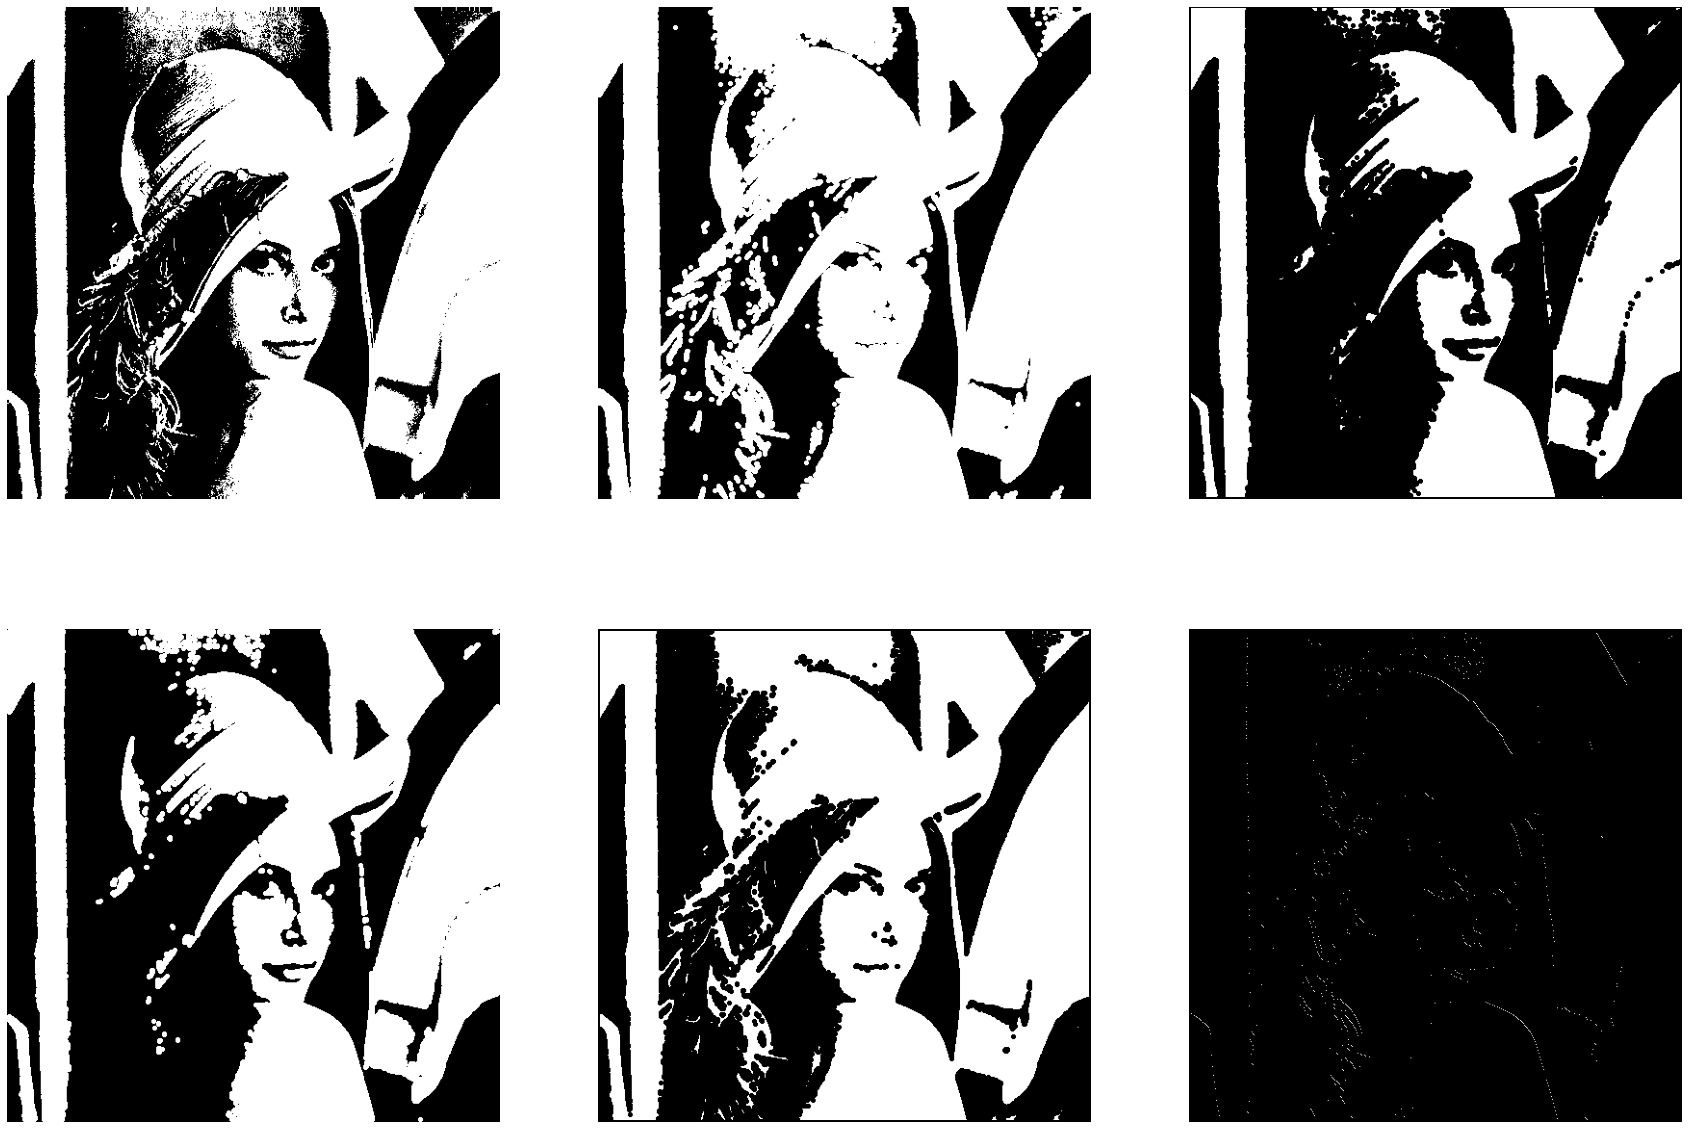

In [ ]:
# create figure
fig = plt.figure(figsize=(30, 21))

# setting values to rows and column variables
rows = 2
columns = 3

problemList = ['lena_binarized.bmp','a_dilated_image.bmp','b_eroded_image.bmp','c_opening_.bmp','d_closing_.bmp','e_hitandmiss_.bmp']

for i, element in enumerate(problemList):
    fig.add_subplot(rows, columns, i+1 )
    plt.imshow(cv2.imread(element))
    plt.axis('off')
plt.savefig('final_result.png')